In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchimport random

In [2]:
train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=None,
)

test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=None,
)

print("Train 개수:", len(train_dataset))
print("Test 개수 :", len(test_dataset))

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.76MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.6MB/s]

Train 개수: 60000
Test 개수 : 10000


In [3]:
def resize_mnist_dataset(dataset, size=(16, 16)):
    """
    dataset: torchvision.datasets.MNIST (transform=None, PIL Image 반환)
    size: (width, height), 기본 (16, 16)

    return:
        X: np.ndarray, shape (N, H, W), dtype uint8 (0~255)
        y: np.ndarray, shape (N,),    dtype int64
    """
    N = len(dataset)
    W, H = size

    X = np.zeros((N, H, W), dtype=np.uint8)
    y = np.zeros((N,), dtype=np.int64)

    for i in range(N):
        img_pil, label = dataset[i]          # img_pil: PIL.Image, 28x28, L-mode
        # LANCZOS 16x16 resize
        img_16 = img_pil.resize((W, H), resample=Image.LANCZOS)

        X[i] = np.array(img_16, dtype=np.uint8)  # (16,16)
        y[i] = int(label)

    return X, y

In [4]:
X_train_16_np, y_train_np = resize_mnist_dataset(train_dataset, size=(16, 16))
X_test_16_np,  y_test_np  = resize_mnist_dataset(test_dataset,  size=(16, 16))

print("Train 16x16 shape:", X_train_16_np.shape)
print("Test  16x16 shape:", X_test_16_np.shape)

Train 16x16 shape: (60000, 16, 16)
Test  16x16 shape: (10000, 16, 16)


In [6]:
X_train_16 = torch.from_numpy(X_train_16_np).unsqueeze(1)  # (N,1,16,16)
y_train = torch.from_numpy(y_train_np)                     # (N,)

X_test_16 = torch.from_numpy(X_test_16_np).unsqueeze(1)    # (N,1,16,16)
y_test = torch.from_numpy(y_test_np)                       # (N,)

print("Train tensor:", X_train_16.shape, y_train.shape)
print("Test  tensor:", X_test_16.shape, y_test.shape)
print("dtype (이미지):", X_train_16.dtype)  # uint8 (0~255)


Train tensor: torch.Size([60000, 1, 16, 16]) torch.Size([60000])
Test  tensor: torch.Size([10000, 1, 16, 16]) torch.Size([10000])
dtype (이미지): torch.uint8


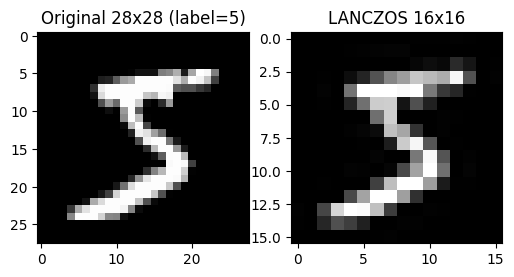

In [7]:
idx = 0
orig_pil, orig_label = train_dataset[idx]
resized_16 = X_train_16[idx, 0].numpy()  # (16,16)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(orig_pil, cmap='gray')
plt.title(f"Original 28x28 (label={orig_label})")

plt.subplot(1,2,2)
plt.imshow(resized_16, cmap='gray')
plt.title("LANCZOS 16x16")
plt.show()

In [8]:
torch.save(
    {"images": X_train_16, "labels": y_train},
    "mnist_16_train_lanczos.pt"
)
torch.save(
    {"images": X_test_16, "labels": y_test},
    "mnist_16_test_lanczos.pt"
)

print("save : mnist_16_train_lanczos.pt, mnist_16_test_lanczos.pt")

save : mnist_16_train_lanczos.pt, mnist_16_test_lanczos.pt


In [9]:
data = torch.load("mnist_16_train_lanczos.pt")

X = data["images"]   # shape: (60000, 1, 16, 16)
y = data["labels"]   # shape: (60000,)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("dtype:", X.dtype)


X shape: torch.Size([60000, 1, 16, 16])
y shape: torch.Size([60000])
dtype: torch.uint8


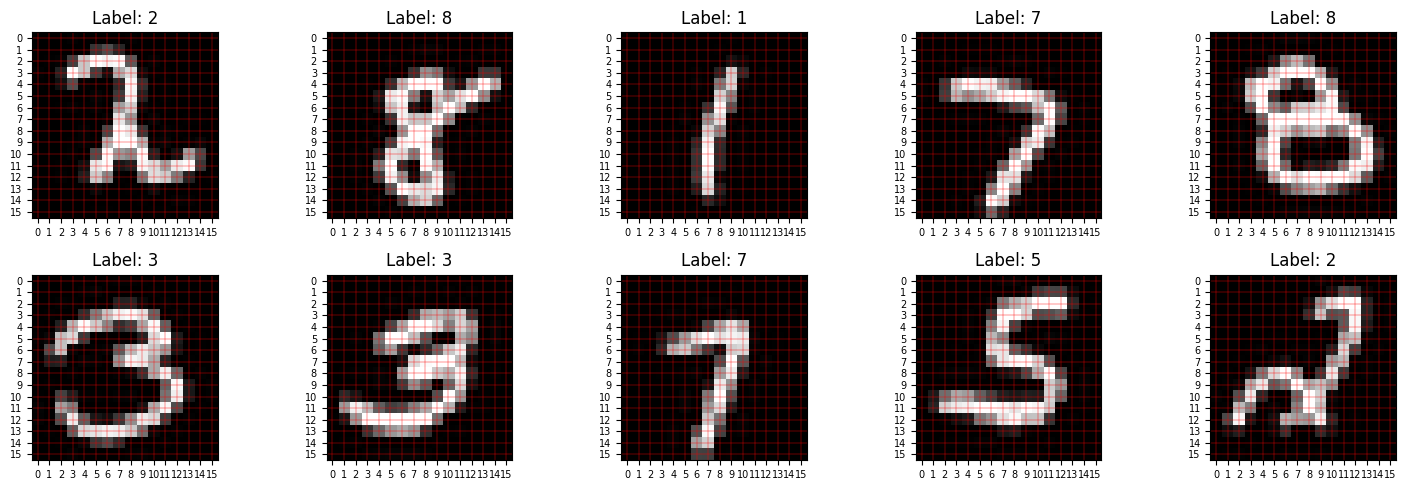

In [35]:
plt.figure(figsize=(15, 5))

for i in range(10):
    idx = random.randint(0, len(X)-1)
    img = X[idx][0].numpy()
    label = int(y[idx])

    plt.subplot(2,5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}", fontsize=12)

    plt.xticks(range(16))
    plt.yticks(range(16))

    plt.grid(color='red', linestyle='-', linewidth=0.3)
    plt.tick_params(axis='both', labelsize=7)
    plt.axis('on')

plt.tight_layout()
plt.show()
